In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dict = {'Movie': ['Barbie', 'Oppenheimer'], 
           'Production Budget': [145, 100], 
           'Domestic Opening Weekend': [162, 83], 
           'Domestic Gross': [214, 107], 
           'International Gross': [258, 113]}

df = pd.DataFrame(dict)

df

,Movie,Production Budget,Domestic Opening Weekend,Domestic Gross,International Gross
0,Barbie,145,162,214,258
1,Oppenheimer,100,83,107,113


In [3]:
# Use pd.melt() to pivot the dataframe
df_melted = pd.melt(df, id_vars='Movie', var_name='type', value_name='dollars')

# Sort the dataframe by 'movie' for better visualization
df_melted = df_melted.sort_values(by='Movie')

df_melted

,Movie,type,dollars
0,Barbie,Production Budget,145
2,Barbie,Domestic Opening Weekend,162
4,Barbie,Domestic Gross,214
6,Barbie,International Gross,258
1,Oppenheimer,Production Budget,100
3,Oppenheimer,Domestic Opening Weekend,83
5,Oppenheimer,Domestic Gross,107
7,Oppenheimer,International Gross,113


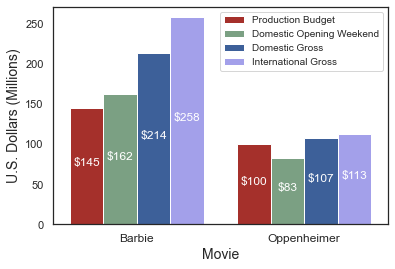

In [4]:
# Create seaborn bar chart based on df

sns.set_theme(style="white")
ax = sns.barplot(data = df_melted, x = 'Movie', y = 'dollars', hue = 'type', palette = ['#B91E17','#75A67F', '#2E5CA8', '#9894F6'])

plt.ylabel("U.S. Dollars (Millions)", fontsize=14)
plt.xlabel("Movie", fontsize=14)
plt.tick_params(axis='x', which='major', labelsize=12)

for i in ax.containers:
    ax.bar_label(i, label_type='center', fmt='$%.f', fontsize=12, padding=3, rotation=0, color='white')

plt.legend(loc='upper right', fontsize='small')

plt.savefig("barbenheimer.png", transparent=True, dpi=300)

In [5]:
# Mattel, Inc. (MAT) stock price history - Yahoo Finance
mat = pd.read_csv('MAT.csv')
mat['Company'] = 'Mattel, Inc.'

# IMAX Corporation (IMAX) stock price history - Yahoo Finance
imax = pd.read_csv('IMAX.csv')
imax['Company'] = 'IMAX Corporation'

In [6]:
# merge mat and imax

all = mat.append(imax, ignore_index=True)
all['Date'] = pd.to_datetime(all['Date'])
all

,Date,Open,High,Low,Close,Adj Close,Volume,Company
0,2023-01-03,17.889999,18.070000,17.639999,17.889999,17.889999,2466000,"Mattel, Inc."
1,2023-01-04,18.030001,18.459999,17.780001,18.400000,18.400000,4375600,"Mattel, Inc."
2,2023-01-05,18.410000,19.480000,18.340000,19.280001,19.280001,6615100,"Mattel, Inc."
3,2023-01-06,19.320000,20.270000,19.250000,19.910000,19.910000,5768300,"Mattel, Inc."
4,2023-01-09,19.950001,19.969999,19.480000,19.549999,19.549999,2785700,"Mattel, Inc."
...,...,...,...,...,...,...,...,...
277,2023-07-20,16.900000,16.980000,16.590000,16.600000,16.600000,359700,IMAX Corporation
278,2023-07-21,16.730000,17.059999,16.150000,16.410000,16.410000,644800,IMAX Corporation
279,2023-07-24,16.760000,17.730000,16.709999,16.889999,16.889999,1697100,IMAX Corporation
280,2023-07-25,17.059999,17.190001,16.709999,16.900000,16.900000,722700,IMAX Corporation


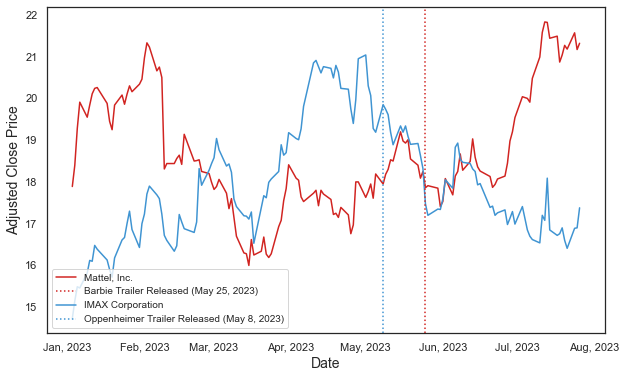

In [7]:
sns.set_theme(style='white')
ax = sns.lineplot(data=all, x='Date', y='Adj Close', hue='Company', palette=['#d12421', '#3F94D2'])

# Format x-ticks using mdates to display only the months

import matplotlib.dates as mdates
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b, %Y'))
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=15))


plt.ylabel('Adjusted Close Price', fontsize=14)
plt.xlabel('Date', fontsize=14)

barbie_trailer = mdates.datestr2num('2023-05-25')
line1 = plt.axvline(x=barbie_trailer, color='#d12421', linestyle=':', label='Barbie Trailer Released (May 25, 2023)')

oppenheimer_trailer = mdates.datestr2num('2023-05-08')
line2 = plt.axvline(x=oppenheimer_trailer, color='#3F94D2', linestyle=':', label='Oppenheimer Trailer Released (May 8, 2023)')

# Change fig size
plt.gcf().set_size_inches(10, 6)

#get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()


order = [0,2,1,3]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='lower left', fontsize='small') 
# plt.legend(loc='lower right', fontsize='small')

plt.savefig("mat_imax_stocks.png", transparent=True, dpi=300)
